<a href="https://colab.research.google.com/github/manjusha-24/Supervised/blob/main/Energy_Consumption_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import Libraries

Import the required libraries and functions.

In [1]:
import warnings
warnings.filterwarnings("ignore")

# 'Pandas' is used for data manipulation and analysis
import pandas as pd

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

# import functions from sklearn to perform different clustering algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import euclidean_distances

# import functions from scipy to plot the dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA

In [2]:
plt.rcParams['figure.figsize'] = [15,8]

#2. Read Data

In [3]:
df_power = pd.read_excel('/content/power.xlsx')

# head() to display top five rows
df_power.head()

# head() to display top five rows
df_power.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
0,2.242,0.162,237.33,10.0,1,7,17
1,3.714,0.296,235.15,15.8,2,35,17
2,3.212,0.304,235.99,14.2,1,26,17
3,3.694,0.280,235.16,15.6,1,35,17
4,3.204,0.292,236.08,14.0,1,27,17


#3. Exploratory Data Analysis

Data preparation is the process of cleaning and transforming raw data before building models.

Here we analyze the data with the following steps:
1. Check dimensions of the dataframe in terms of rows and columns
2. Check the data type. Refer data definition to validate the data type
3. Check the distribution of variables
4. Check for the outliers 5. Study summary statistics
6. Check for missing values
7. Scale the data

#3.1 Understand the Dataset
Dimensions of the data

In [4]:
df_power.shape


(21240, 7)

There are 21240 observations and 7 columns in the dataset.

#3.2 Data Type
The main data types stored in Pandas data frames are the object, float, int64, bool, and datetime64. To understand each attribute of our data, it is always good for us to know the data type of each column.

In our dataset, we have numerical and categorical variables. The numerical variables should have data type 'int64' while categorical variables should have data type 'object'.

1. Check for the data type
2. For any incorrect data type, change the data type with the appropriate type
3. Recheck for the data type

1. Check for the data type

In [5]:
df_power.dtypes

,0
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Kitchen_consumption,int64
Laundry_consumption,int64
Other_appliances_consumption,int64


All the variables have the data type as per the data definition. Thus, there is no need for type conversion.

#3.3 Distribution of Variables

Check the distribution of all the variables.
As all the variables are numerical, we plot the boxplot for each variable to check the distribution. Also, we can use these boxplots to identify the outliers in the variables.

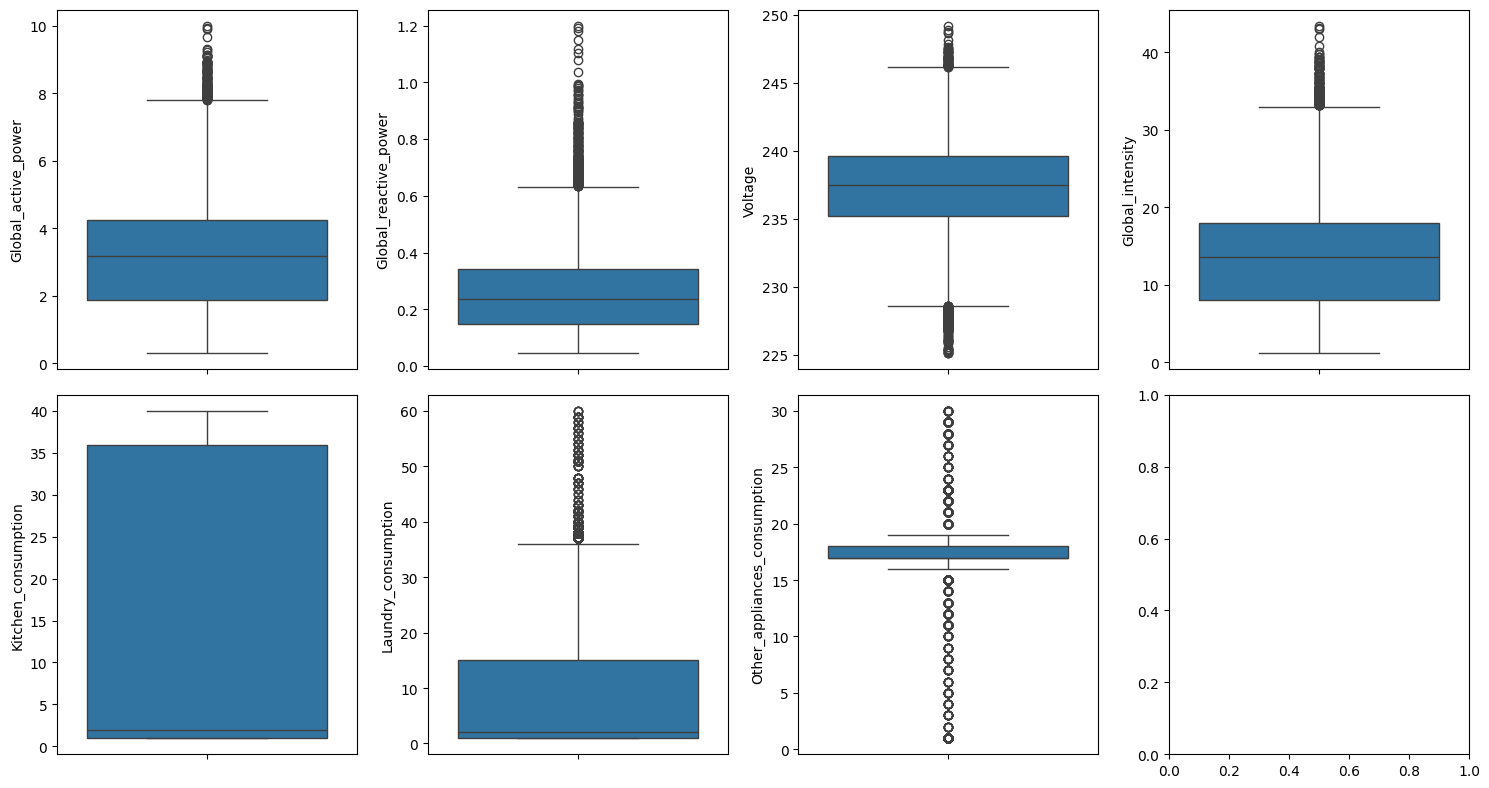

In [6]:
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize=(15, 8))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_power.columns, ax.flatten()):

    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df_power[variable], ax = subplot)

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

The above boxplots show that the variable 'Voltage' is near normally distributed, and the variable 'Other_appliances_consumption' is negatively distributed. All the remaining variables are positively distributed.

Also, it can be easily seen that all the variables except 'Kitchen_consumption' have outliers.

#3.4 Analysis of Outliers
Importance of detecting an outlier
An outlier is an observation that appears to deviate distinctly from other observations in the data. If the outliers are not removed, the model accuracy may decrease.

The data distribution in the previous section exhibits the presence of outliers in the data. Now let us use the IQR method to remove these observations and plot the boxplots to recheck the presence of outliers.


To treat the outliers in the data, we perform the following:

1. Remove outliers by IQR method
2. Plot the boxplot to recheck for outliers

1.Remove outliers by IQR method

In [7]:
Q1 = df_power.quantile(0.25)

# calculate the third quartile
Q3 = df_power.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
df_power = df_power[~((df_power < (Q1 - 1.5 * IQR)) | (df_power > (Q3 + 1.5 * IQR))).any(axis=1)]

# reset the index of the dataframe without outliers
df_power = df_power.reset_index(drop = True)

To confirm that the outliers have been removed; let us visualize the boxplot again.

2. Plot the boxplot to recheck for outliers

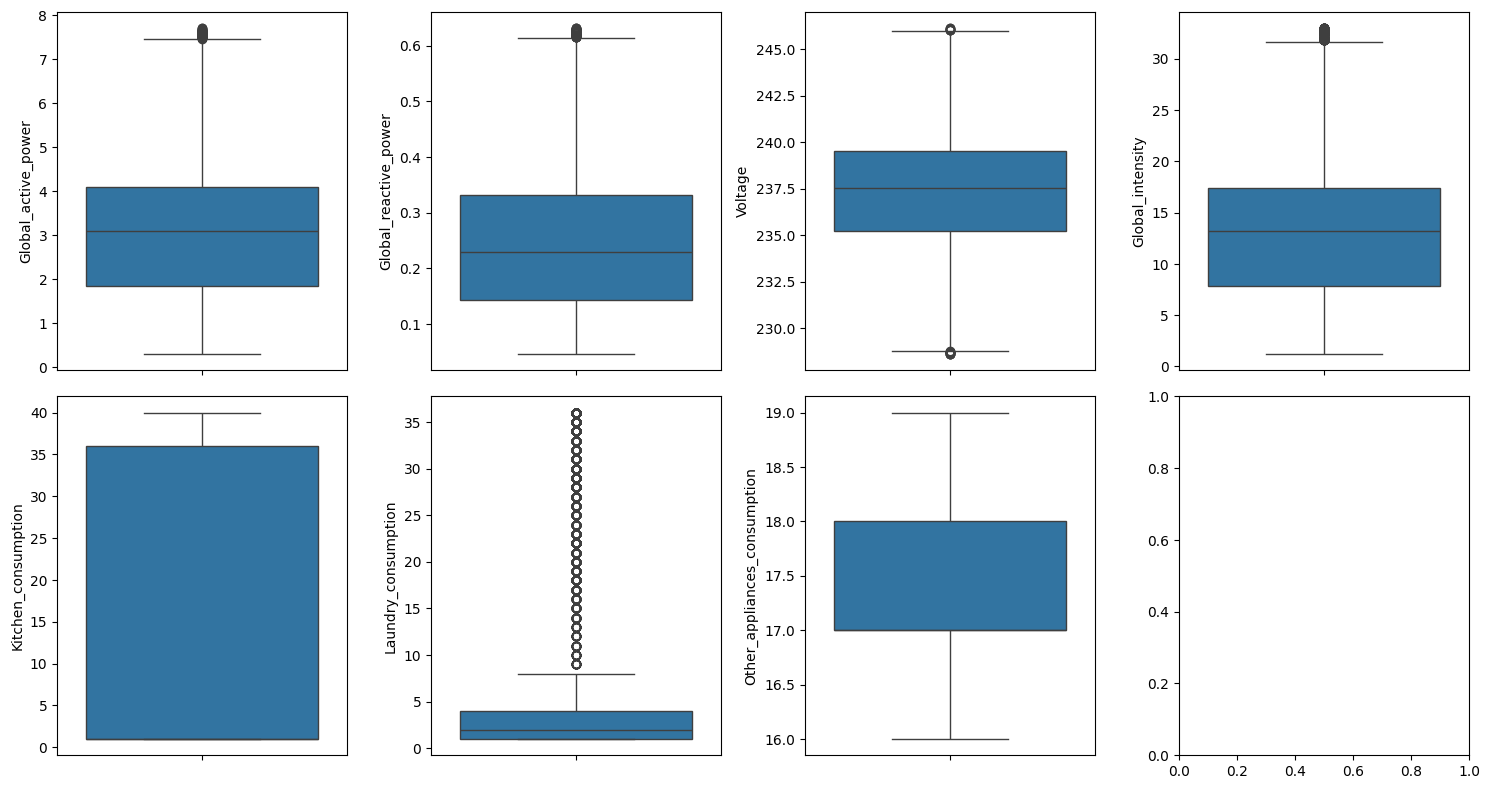

In [8]:
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize=(15, 8))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_power.columns, ax.flatten()):

    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df_power[variable], ax = subplot)

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

Observing the range of the boxplots, we say that the outliers are removed from the original data. The new 'outliers' that we can see in the variables are moderate outliers that lied within the upper whisker-lower whisker range before removing the original outliers. It can be seen that the variable Other_appliances_consumption has no new outliers.

It is up to the discretion of the data scientist, to remove them or not; and maybe decided after evaluating the model performance.

A crude way to know whether the outliers have been removed or not is to check the dimensions of the data. If the dimension is reduced it implies that the outliers are removed.

In [9]:
# check the shape of the data after removal of outliers
df_power.shape

(16724, 7)

The output shows a reduction in the number of observations. Thus we may say that the potential outliers have been removed.

#3.5 Summary Statistics

Check the statistical summary of all the variables.

In [10]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of numerical variables
df_power.describe()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
count,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000
mean,3.197480,0.249404,237.351591,13.601495,13.151937,6.802141,17.428426
std,1.444141,0.132148,3.289317,6.204866,16.384600,10.920451,0.705236
min,0.302000,0.046000,228.600000,1.200000,1.000000,1.000000,16.000000
25%,1.858000,0.144000,235.220000,7.800000,1.000000,1.000000,17.000000
50%,3.096000,0.230000,237.510000,13.200000,1.000000,2.000000,17.000000
75%,4.100000,0.332000,239.520000,17.400000,36.000000,4.000000,18.000000
max,7.716000,0.632000,246.150000,33.000000,40.000000,36.000000,19.000000


The above output illustrates the summary statistics of the numerical variables.
The average active power for the house is 3.19 KW. Whereas the average current intensity is 13.6 ampere. The consumption of other appliances is 16-19 watt-hours of active energy.

#3.6 Missing Values

First, run a check for the presence of missing values and their percentage for each column. Then choose the right approach to remove them.

Let us plot the heatmap to visualize the missing values in the data.

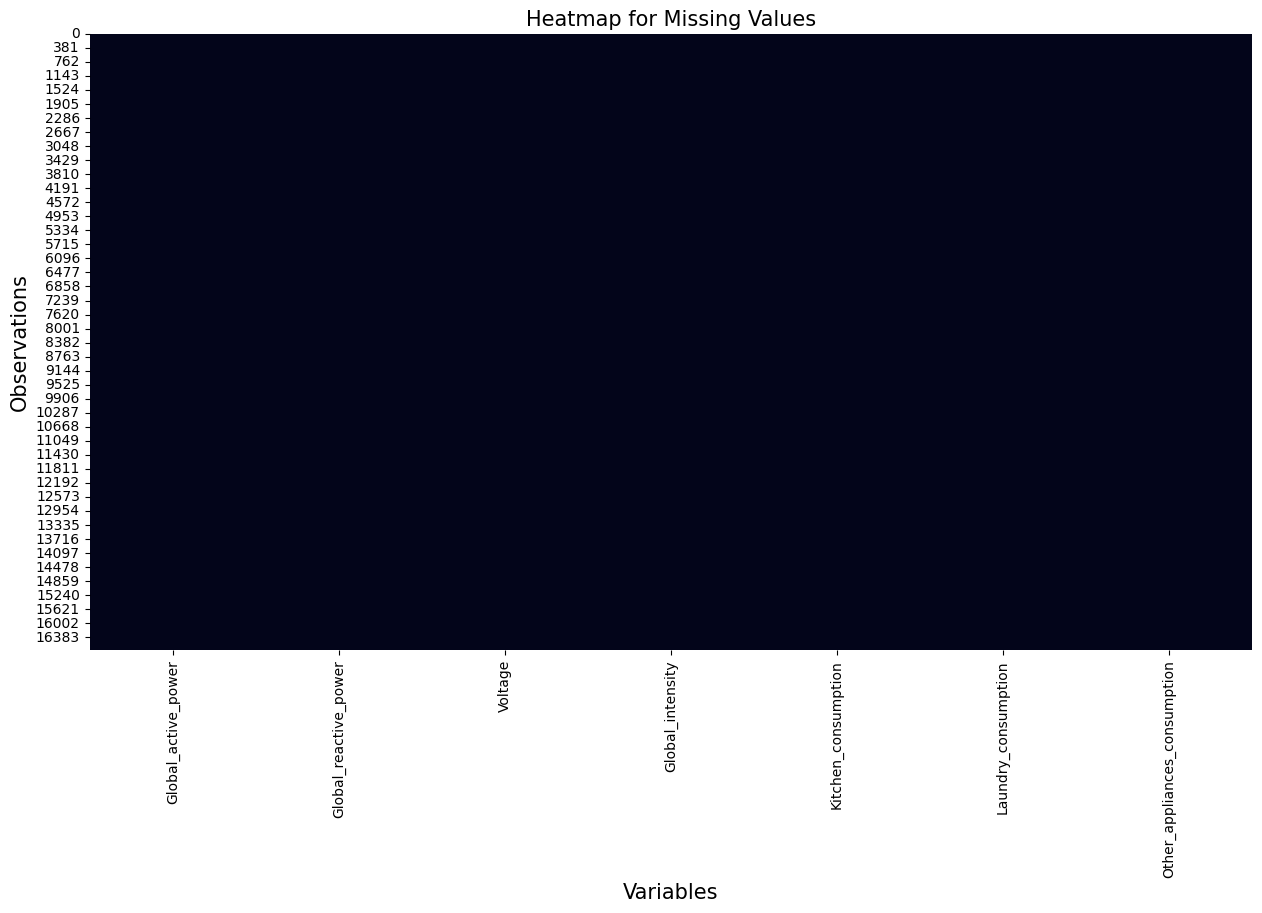

In [11]:
sns.heatmap(df_power.isnull(), cbar=False)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Heatmap for Missing Values', fontsize = 15)
plt.xlabel('Variables', fontsize = 15)
plt.ylabel('Observations', fontsize = 15)

# display the plot
plt.show()

The above plot shows that there are no missing values in the data.

Note: The heatmap represents the missing values with the horizontal non-black colored lines across the observation and the variable that contain missing data.

#3.7 Prepare the Data
Feature scaling is used to transform all the variables in the same range. If the variables are not in the same range, then the variable with higher values can dominate our final result.

The two most discussed scaling methods are min-max normalization and z-score normalization (aka standardization).

Scale the data

Here let us use the z-score normalization (i.e. standardization) technique to scale the dataset. In the scaled data, each variable will have a mean 0 and a standard deviation of 1.

In [12]:
# create a copy of the original dataset
features = df_power.copy()

# head() to display top five rows
features.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
0,2.242,0.162,237.33,10.0,1,7,17
1,3.714,0.296,235.15,15.8,2,35,17
2,3.212,0.304,235.99,14.2,1,26,17
3,3.694,0.280,235.16,15.6,1,35,17
4,3.204,0.292,236.08,14.0,1,27,17


In [13]:
scaler = StandardScaler()

# fit the scaler on 'features' and transform the data
features = scaler.fit_transform(features)

# create a dataframe of the scaled features
# pass the required column names to the parameter 'columns'
features_scaled = pd.DataFrame(features, columns = df_power.columns)

# head() to display top five rows
features_scaled.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
0,-0.661645,-0.661430,-0.006564,-0.580448,-0.741690,0.018119,-0.607511
1,0.357676,0.352612,-0.669335,0.354330,-0.680656,2.582192,-0.607511
2,0.010054,0.413151,-0.413956,0.096460,-0.741690,1.758026,-0.607511
3,0.343827,0.231532,-0.666295,0.322096,-0.741690,2.582192,-0.607511
4,0.004515,0.322342,-0.386593,0.064227,-0.741690,1.849600,-0.607511


Thus, we have scaled all the features in the data and stored it in a dataframe 'features_scaled'.

#4.1 Identify the Optimal Number of Clusters

Plot the elbow plot and identify the optimal number of clusters. Also, use the silhouette score method to validate the optimal number of clusters.

We do not know how many clusters give the most useful results. So, we create the clusters with varying K, from 1 to 7 and then decide the optimum number of clusters (K) with the help of the elbow plot.



#Find out the Min and Max Values of all the features of the table

In [14]:
for i in df_power.columns:
    print(i)
    print('Min',df_power[i].min())
    print('Max',df_power[i].max())


    print('Min',features_scaled[i].min())
    print('Max',features_scaled[i].max())

Global_active_power
Min 0.302
Max 7.716
Min -2.005044320603501
Max 3.1289564681078335
Global_reactive_power
Min 0.046
Max 0.632
Min -1.5392570424120555
Max 2.8952829244099645
Voltage
Min 228.6
Max 246.15
Min -2.6606896175529964
Max 2.674923678744875
Global_intensity
Min 1.2
Max 33.0
Min -1.9987322781469545
Max 3.1264310327633393
Kitchen_consumption
Min 1
Max 40
Min -0.7416904078334242
Max 1.6386646834362335
Laundry_consumption
Min 1
Max 36
Min -0.5313255003183429
Max 2.6737661506976704
Other_appliances_consumption
Min 16
Max 19
Min -2.0255176145662355
Max 2.22850179846977


In [15]:
wcss =[]
for i in range(1,8):
  kmeans = KMeans(n_clusters = i, random_state=10)
  kmeans.fit(features_scaled)
  wcss.append(kmeans.inertia_)


Let us plot the elbow plot and identify the elbow point.

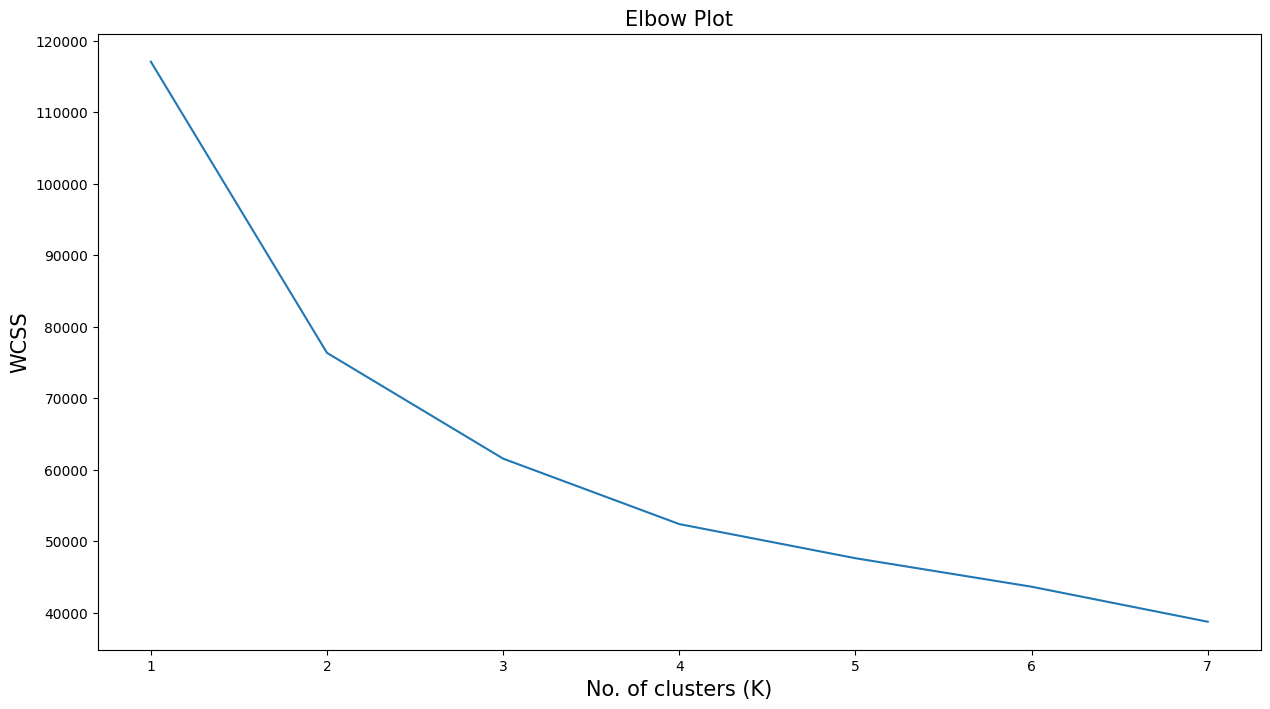

In [16]:
plt.plot(range(1,8), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# display the plot
plt.show()

From the above plot, we can consider the K = 2 or 3 as the optimal number of clusters; as after these values, the WCSS is not decreasing rapidly.

Since the elbow point is not clearly visible, we can also use the KneeLocator() from the 'kneed' library in python. This function returns the point of maximum curvature (i.e. elbow/knee point).

In [17]:
# import the 'KneeLocator'
!pip install kneed
from kneed.knee_locator import KneeLocator

# pass the number of clusters and corresponding WCSS to parameters 'x' and 'y' respectively
# pass the type of the curve to the parameter 'curve'
# pass the direction of the data points to the parameter 'direction'
k = KneeLocator(x  = range(1,8), y = wcss, curve = 'convex', direction = 'decreasing')

# 'elbow' returns the corresponding x-axis value at the maximum curvature
k.elbow

3

The python in-built elbow locator function returns K = 3 as the optimal value for the number of clusters.


Use the silhouette score method to validate the optimal number of clusters.
Let us find the silhouette score with different values of K from 2 to 7. We consider the optimal value of K for which the silhouette score is maximum.

Note: Since the silhouette score considers the inter-cluster and intra-cluster distance, we never set K = 1.



In [18]:
n_clusters = [2, 3, 4, 5, 6, 7]

# use 'for' loop to build the clusters with different K
# 'random_state' returns the same sample each time you run the code
# fit and predict on the scaled data
for K in n_clusters :
    cluster = KMeans (n_clusters = K, random_state = 10)
    predict = cluster.fit_predict(features_scaled)

    # 'silhouette_score' function computes the silhouette score for each K
    # pass the scaled data and predicted labels to the 'silhouette_score()'
    score = silhouette_score(features_scaled, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 2, silhouette score is 0.3288088333501783)
For n_clusters = 3, silhouette score is 0.34164577168944876)
For n_clusters = 4, silhouette score is 0.2783093083068228)
For n_clusters = 5, silhouette score is 0.26136630223495155)
For n_clusters = 6, silhouette score is 0.25166284554488083)
For n_clusters = 7, silhouette score is 0.2651478711401227)


The optimum value for K is associated with the highest value of the silhouette score. From the above output it can be seen that, for K = 3, the score is the highest.
From the elbow plot and silhouette score method, we can consider the optimal number of clusters as 3.

Now let us group the dataset into 3 clusters.

#4.2 Build the Model
Let us group the dataset into 3 clusters and check the number of elements in each cluster.

In [19]:
K_model = KMeans(n_clusters= 3, random_state= 10)

# fit the model on the scaled data
K_model.fit(features_scaled)

KMeans(n_clusters=3, random_state=10)

As we have built the 3 clusters, now we want to know how many houses belong to each cluster.

In [20]:
# add a column 'Kmeans_label' to the original dataframe
# the 'labels_' returns the cluster number for each observation
df_power['Kmeans_label'] = K_model.labels_

# use the 'head()' to display top five rows
df_power.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption,Kmeans_label
0,2.242,0.162,237.33,10.0,1,7,17,1
1,3.714,0.296,235.15,15.8,2,35,17,2
2,3.212,0.304,235.99,14.2,1,26,17,2
3,3.694,0.280,235.16,15.6,1,35,17,2
4,3.204,0.292,236.08,14.0,1,27,17,2


In [21]:
# the 'unique()' returns the number of distinct clusters
# the 'return_counts = True' gives the number observation in each cluster
np.unique(K_model.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([5051, 9041, 2632]))

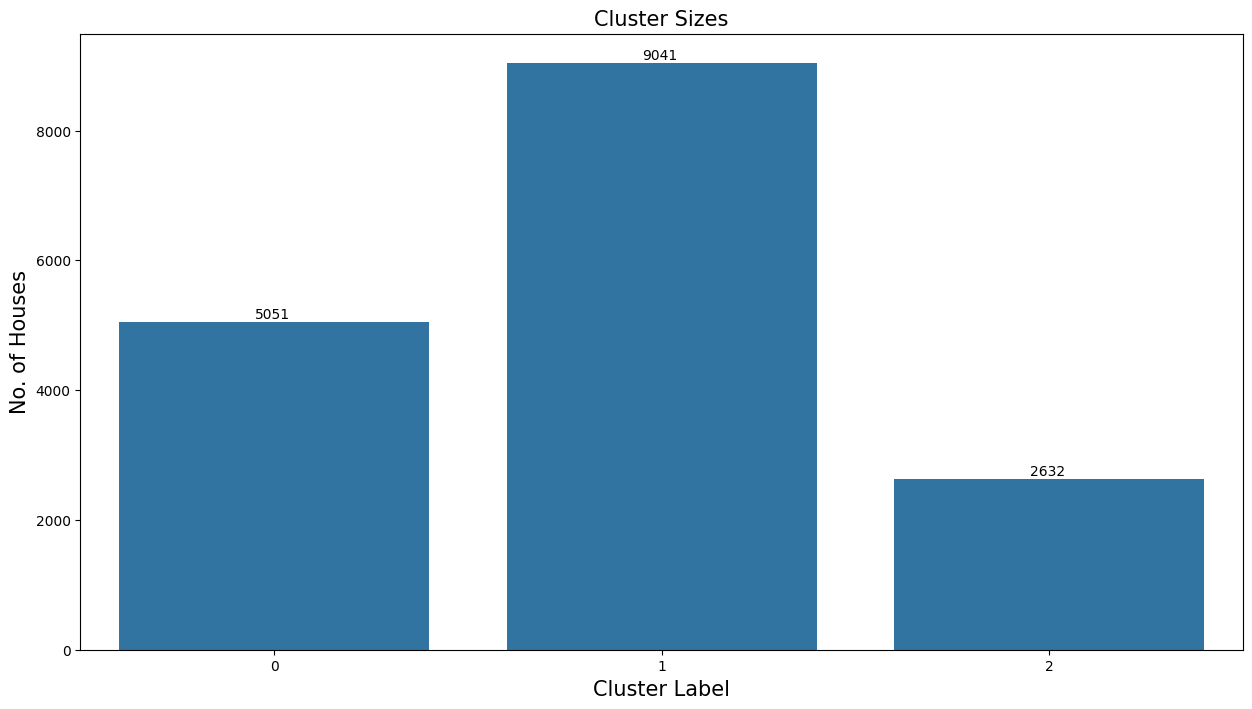

In [22]:
sns.countplot(data= df_power, x = 'Kmeans_label')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Cluster Label', fontsize = 15)
plt.ylabel('No. of Houses', fontsize = 15)

# add values in the graph
# 'x' and 'y' assigns the position to the text
# 's' represents the text on the plot
plt.text(x = -0.05, y = np.unique(K_model.labels_, return_counts=True)[1][0] + 50,
         s = np.unique(K_model.labels_, return_counts=True)[1][0])

plt.text(x = 0.95, y = np.unique(K_model.labels_, return_counts=True)[1][1] + 50,
         s = np.unique(K_model.labels_, return_counts=True)[1][1])

plt.text(x = 1.95, y = np.unique(K_model.labels_, return_counts=True)[1][2] + 50,
         s = np.unique(K_model.labels_, return_counts=True)[1][2])

# display the plot
plt.show()

The largest cluster is the one containing 9041 houses.

In [23]:
# form a dataframe containing cluster centers
# the 'cluster_centers_' returns the co-ordinates of the center of each cluster
centers = pd.DataFrame(K_model.cluster_centers_, columns =  (df_power.drop('Kmeans_label', axis=1)).columns)

# display the cluster centers
centers

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
0,0.731307,0.148177,-0.424477,0.724593,1.250326,-0.431169,-0.293117
1,-0.752098,-0.074533,0.437545,-0.752210,-0.692643,-0.376825,0.322668
2,1.180834,-0.028038,-0.688831,1.194084,-0.017778,2.119872,-0.546140


A row in the above dataframe represents the center of a single cluster. Each element in the row corresponds to the average of the column variable.

In [24]:
unscaled_centers = pd.DataFrame(scaler.inverse_transform(K_model.cluster_centers_),
                                columns =  (df_power.drop('Kmeans_label', axis=1)).columns)

# display the dataframe
unscaled_centers

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
0,4.253560,0.268985,235.955391,18.097365,33.637408,2.093719,17.221716
1,2.111377,0.239555,238.790772,8.934270,1.803605,2.687161,17.655977
2,4.902720,0.245699,235.085873,21.010402,12.860668,29.951405,17.043280


#4.3 Analyze the Clusters

In [25]:
df_power[df_power.Kmeans_label == 0].describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption,Kmeans_label
count,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000,5051.0
mean,4.253184,0.269026,235.953981,18.095941,33.623639,2.100376,17.221144,0.0
std,0.730430,0.141033,2.869917,3.115367,9.473439,2.864743,0.663322,0.0
min,2.170000,0.046000,228.620000,10.200000,1.000000,1.000000,16.000000,0.0
25%,3.731000,0.162000,234.130000,15.800000,36.000000,1.000000,17.000000,0.0
50%,4.066000,0.252000,236.160000,17.200000,37.000000,1.000000,17.000000,0.0
75%,4.685000,0.368000,237.860000,20.000000,38.000000,2.000000,18.000000,0.0
max,7.698000,0.632000,245.010000,32.800000,40.000000,22.000000,19.000000,0.0


In [26]:
df_power[df_power.Kmeans_label == 1].describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption,Kmeans_label
count,9041.000000,9041.000000,9041.00000,9041.000000,9041.000000,9041.000000,9041.000000,9041.0
mean,2.111206,0.239558,238.79215,8.933481,1.803672,2.687313,17.656343,1.0
std,0.666335,0.124963,2.84156,2.853669,2.909028,4.550808,0.658442,0.0
min,0.302000,0.046000,228.95000,1.200000,1.000000,1.000000,16.000000,1.0
25%,1.568000,0.138000,237.05000,6.600000,1.000000,1.000000,17.000000,1.0
50%,1.928000,0.222000,238.80000,8.200000,1.000000,1.000000,18.000000,1.0
75%,2.590000,0.316000,240.65000,11.000000,1.000000,2.000000,18.000000,1.0
max,5.100000,0.632000,246.15000,21.400000,30.000000,33.000000,19.000000,1.0


In [27]:
df_power[df_power.Kmeans_label == 2].describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption,Kmeans_label
count,2632.000000,2632.000000,2632.000000,2632.000000,2632.000000,2632.000000,2632.000000,2632.0
mean,4.902894,0.245573,235.085338,21.011094,12.846884,29.959726,17.043313,2.0
std,1.265837,0.134455,3.033034,5.433421,16.055980,5.830748,0.646325,0.0
min,2.404000,0.046000,228.600000,10.600000,1.000000,5.000000,16.000000,2.0
25%,3.766000,0.134000,232.830000,16.000000,1.000000,26.000000,17.000000,2.0
50%,4.895000,0.228000,235.120000,21.000000,1.000000,31.000000,17.000000,2.0
75%,5.868000,0.328000,237.150000,25.050000,36.000000,35.000000,17.000000,2.0
max,7.716000,0.626000,245.050000,33.000000,40.000000,36.000000,19.000000,2.0


#5. Hierarchical Clustering

#5.1 Identify the Optimal Number of Clusters

In [28]:
link_mat = linkage(features_scaled, method = 'ward')

# print first 10 observations of the linkage matrix 'link_mat'
print(link_mat[0:10])

[[ 5946.          5947.             0.00138495     2.        ]
 [13128.         13129.             0.00138495     2.        ]
 [13905.         13908.             0.00138495     2.        ]
 [12811.         12813.             0.0027699      2.        ]
 [ 1057.          1060.             0.00304024     2.        ]
 [ 7058.          7062.             0.00304024     2.        ]
 [ 5164.          5167.             0.00304024     2.        ]
 [ 6752.          6753.             0.00304024     2.        ]
 [12130.         12132.             0.00304024     2.        ]
 [ 8754.          8757.             0.00304024     2.        ]]


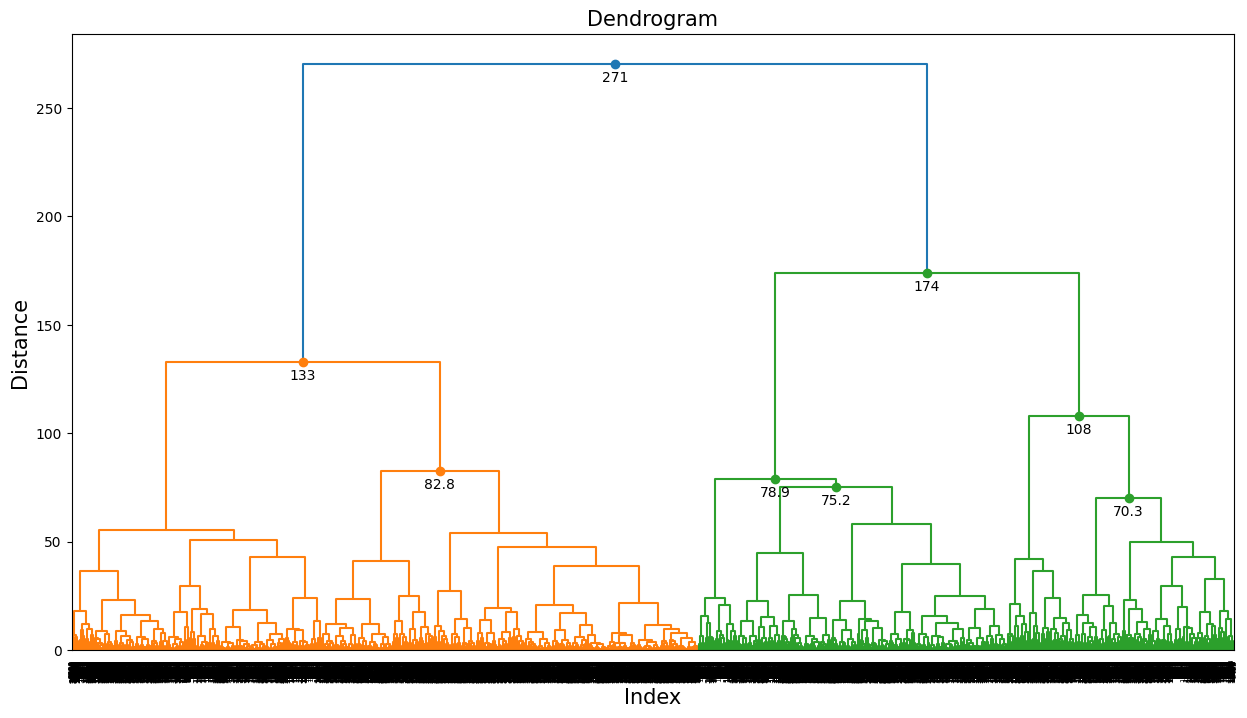

In [29]:
# plot the dendrogram
# pass the linkage matrix
dendro = dendrogram(link_mat)

# annotate the distance on the y-axis for distance > 60
# 'dendro' returns the dictionary containing x,y coordinates and the color list for each merge
# the 'icoord' returns the x-coordinates for the rectangle that represents the merging
# the 'dcoord' returns the y-coordinates (distance) for the each corner of the rectangle that represents the merging
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):

    # consider 'x' as the x-coordinate of the average distance on the merging line
    x = sum(i[1:3])/2

    # consider 'y' as the distance at which the merging occurs
    y = d[1]

    # pass the if-condition for annotation
    if y > 60:

        # plot the bullet and annotate the merging distance 'y'
        plt.plot(x, y, 'o', c=c)

        # pass the conditions to annotate the distance
        plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Dendrogram', fontsize = 15)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Distance', fontsize = 15)

# display the plot
plt.show()

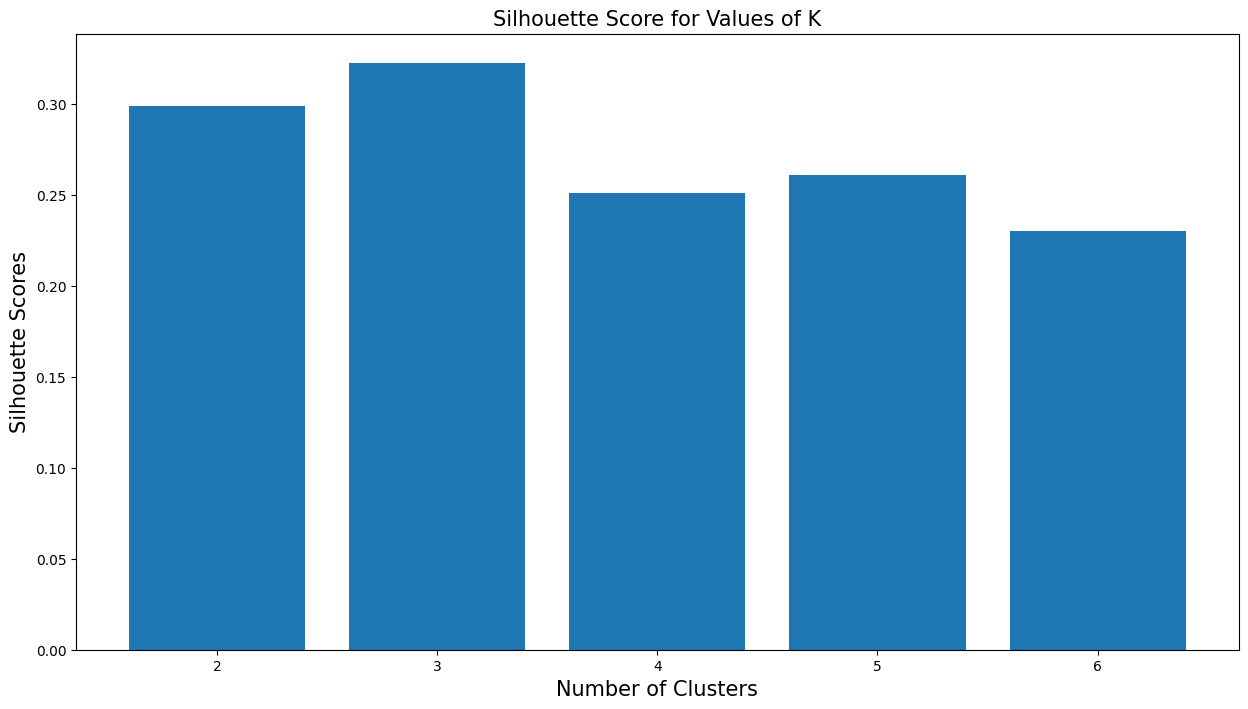

In [30]:
K = [2, 3, 4, 5, 6]

# consider an empty list tot store the silhouette score
silhouette_scores = []

# consider a for loop to perform clustering for different values of K
for i in K:

    # instantiate clustering for each value of K
    # use the 'ward' linkage method (same as the dendrogram)
    hierar_model = AgglomerativeClustering(n_clusters = i, linkage = 'ward')

    # calculate the silhouette score and append to the list 'silhouette_scores'
    silhouette_scores.append(silhouette_score(features_scaled, hierar_model.fit_predict(features_scaled)))

# plot the silhouette score for different K
plt.bar(K, silhouette_scores)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Silhouette Score for Values of K', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 15)
plt.ylabel('Silhouette Scores', fontsize = 15)

# display the plot
plt.show()

The above bar plot shows that the silhouette score for K = 3 is the highest.

#5.2 Build the Model¶

In [31]:
hierar_clusters = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')

# fit the model on the scaled data
hierar_clusters.fit(features_scaled)

AgglomerativeClustering(n_clusters=3)

In [32]:
# add a column containing cluster number to the original data
# the 'labels_' returns the cluster number for each observation
df_power['Hierar_label'] = hierar_clusters.labels_

# print head() of the dataframe
df_power.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption,Kmeans_label,Hierar_label
0,2.242,0.162,237.33,10.0,1,7,17,1,0
1,3.714,0.296,235.15,15.8,2,35,17,2,1
2,3.212,0.304,235.99,14.2,1,26,17,2,1
3,3.694,0.280,235.16,15.6,1,35,17,2,1
4,3.204,0.292,236.08,14.0,1,27,17,2,1


In [33]:
# use the 'value_counts()' to get the number of houses in each cluster
df_power['Hierar_label'].value_counts()

,count
Hierar_label,
0,9025
2,4431
1,3268


#5.3 Analyze the Clusters

In [34]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_power[df_power.Hierar_label == 0].describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption,Kmeans_label,Hierar_label
count,9025.000000,9025.000000,9025.000000,9025.000000,9025.000000,9025.000000,9025.000000,9025.000000,9025.0
mean,2.169233,0.243884,238.507899,9.200953,2.204211,1.655180,17.604765,0.945928,0.0
std,0.781089,0.127607,2.974284,3.385530,3.950164,1.331098,0.677592,0.234354,0.0
min,0.302000,0.046000,228.950000,1.200000,1.000000,1.000000,16.000000,0.000000,0.0
25%,1.568000,0.140000,236.700000,6.600000,1.000000,1.000000,17.000000,1.000000,0.0
50%,1.928000,0.226000,238.580000,8.200000,1.000000,1.000000,18.000000,1.000000,0.0
75%,2.640000,0.322000,240.450000,11.200000,2.000000,2.000000,18.000000,1.000000,0.0
max,6.106000,0.632000,246.120000,26.000000,33.000000,20.000000,19.000000,2.000000,0.0


There are 9025 houses in this cluster, which makes this the largest cluster. Here the houses that have the highest average consumption of appliances other than the kitchen and laundry room are grouped. We can see that 50% of the houses have only 1 watt-hour power consumption in the kitchen and the laundry room. The global active power is between 0.3 to 6.1 KW, which is less than the other clusters. The average intensity of the current is the lowest for these houses.

Most of the points in this cluster are grouped into the largest cluster (cluster with label '1') of the K-means clustering.

In [35]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_power[df_power.Hierar_label == 1].describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption,Kmeans_label,Hierar_label
count,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000,3268.0
mean,4.580390,0.242856,235.935382,19.597858,11.941860,27.849143,17.191554,1.747246,1.0
std,1.370074,0.130985,3.369269,5.894014,15.817746,7.038976,0.681669,0.529285,0.0
min,1.562000,0.046000,228.600000,6.600000,1.000000,8.000000,16.000000,0.000000,1.0
25%,3.422000,0.136000,233.510000,14.600000,1.000000,22.000000,17.000000,2.000000,1.0
50%,4.450000,0.228000,235.950000,19.000000,1.000000,29.000000,17.000000,2.000000,1.0
75%,5.684000,0.316000,238.220000,24.200000,35.000000,35.000000,18.000000,2.000000,1.0
max,7.716000,0.626000,246.150000,33.000000,40.000000,36.000000,19.000000,2.000000,1.0


There are 3268 houses in this cluster, which makes this the smallest cluster. Here the houses that have the highest average consumption of the laundry room appliances are grouped. We can see that 50% of the houses have kitchen appliances that consume only 1 watt-hour power. The global active power is between 1.56 to 7.7 KW. On average, the other appliances in these houses are consuming 17 watt-hours of power. The average intensity of the current is the highest for the houses in this cluster.

75% of the observations in this cluster are grouped into the smallest cluster (cluster with label '0') of the K-means clustering.

In [36]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_power[df_power.Hierar_label == 2].describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption,Kmeans_label,Hierar_label
count,4431.000000,4431.000000,4431.000000,4431.000000,4431.000000,4431.000000,4431.000000,4431.000000,4431.0
mean,4.271862,0.265478,236.040934,18.141954,36.342586,1.762582,17.243963,0.013090,2.0
std,0.725525,0.140527,2.920575,3.126222,3.731507,1.970335,0.678811,0.154131,0.0
min,2.456000,0.046000,228.620000,11.600000,1.000000,1.000000,16.000000,0.000000,2.0
25%,3.742000,0.160000,234.210000,15.800000,36.000000,1.000000,17.000000,0.000000,2.0
50%,4.068000,0.246000,236.270000,17.200000,37.000000,1.000000,17.000000,0.000000,2.0
75%,4.685000,0.364000,237.965000,19.800000,38.000000,2.000000,18.000000,0.000000,2.0
max,7.698000,0.632000,245.170000,32.800000,40.000000,27.000000,19.000000,2.000000,2.0


There are 4431 houses in this cluster. Here the houses that have the highest average consumption of kitchen appliances are grouped. We can see that 50% of the houses have laundry room appliances that onsume only 1 watt-hour power. The global active power is between 2.45 to 7.69 KW. The average intensity of the current is 18.14 ampere for these houses.

#6. DBSCAN
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-base clustering method. This method can be used to create non-linear clusters. The method considers the high-density regions as clusters. This method is effective in identifying the noise/ outliers in the data.

#6.1 Build the Model

In [37]:
# consider the array of euclidean distnce between the scaled data points
# the 'euclidean_distances()' returns the distance matrix which is symmetric
# consider only the upper-triangular elements, 'k=1' drops the diagonal elements
dist_array = euclidean_distances(features_scaled)[np.triu_indices(16724, k = 1)]

# calculate the minimum euclidean distance between the data points
print('Minimum Distance:', dist_array.min())

# calculate the maximum euclidean distance between the data points
print('Maximum Distance:', dist_array.max())

Minimum Distance: 0.001384947609371129
Maximum Distance: 10.179949808197904


The above output shows that the minimum distance between two distinct data points is 0.0013 and the maximum distance is 10.18.

In [38]:
# instantiate DBSCAN with epsilon and minimum points
# pass the epsilon value as 1.4
# pass the number of minimum points as 4
dbscan_model = DBSCAN(eps = 1.4, min_samples = 4)

# fit the model on the scaled data
dbscan_model.fit(features_scaled)

DBSCAN(eps=1.4, min_samples=4)

Check the number of clusters formed by DBSCAN.

In [39]:
# display the labels of unique clusters formed by DBSCAN
(set(dbscan_model.labels_))

{-1, 0, 1, 2, 3}

The above output shows that the DBSCAN algorithm has created 4 clusters. The data points labeled as `-1` represent the noise in the data.

In [40]:
# add a column containing cluster number to the original data
# the 'labels_' returns the cluster number for each observation
df_power['DBSCSAN_label'] = dbscan_model.labels_

# print head() of the dataframe
df_power.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption,Kmeans_label,Hierar_label,DBSCSAN_label
0,2.242,0.162,237.33,10.0,1,7,17,1,0,0
1,3.714,0.296,235.15,15.8,2,35,17,2,1,0
2,3.212,0.304,235.99,14.2,1,26,17,2,1,0
3,3.694,0.280,235.16,15.6,1,35,17,2,1,0
4,3.204,0.292,236.08,14.0,1,27,17,2,1,0


Check the number of houses in each cluster.

In [41]:
# use the 'value_counts()' to get the number of houses in each cluster
df_power['DBSCSAN_label'].value_counts()

,count
DBSCSAN_label,
0,7559
2,7048
1,1367
3,739
-1,11


The largest cluster contains 7559 observations and the smallest cluster is the one containing 739 observations. 11 houses are identified as outliers/ noise in the data.

#6.2 Analyze the Clusters

In [42]:
df_power[df_power.DBSCSAN_label == 0].describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption,Kmeans_label,Hierar_label,DBSCSAN_label
count,7559.000000,7559.000000,7559.000000,7559.000000,7559.000000,7559.000000,7559.0,7559.000000,7559.000000,7559.0
mean,3.523585,0.247291,236.095989,15.028416,15.279799,7.921683,17.0,0.840984,0.847467,0.0
std,1.450244,0.133015,2.388117,6.211325,16.969078,11.859132,0.0,0.738757,0.862246,0.0
min,1.206000,0.046000,228.620000,5.200000,1.000000,1.000000,17.0,0.000000,0.000000,0.0
25%,2.279000,0.142000,234.510000,9.800000,1.000000,1.000000,17.0,0.000000,0.000000,0.0
50%,3.576000,0.226000,236.230000,15.200000,2.000000,2.000000,17.0,1.000000,1.000000,0.0
75%,4.467000,0.328000,237.780000,19.000000,37.000000,6.000000,17.0,1.000000,2.000000,0.0
max,7.716000,0.628000,243.630000,33.000000,40.000000,36.000000,17.0,2.000000,2.000000,0.0


There are 7559 houses in this cluster, which makes this the largest cluster. Here the houses in which the other appliances consume 17 watt-hours of power are grouped.
We can see that 50% of the houses have 2 watt-hours of power consumption in the kitchen and the laundry room. The average intensity of the current is 15 ampere for these houses.

In [43]:
df_power[df_power.DBSCSAN_label == 1].describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption,Kmeans_label,Hierar_label,DBSCSAN_label
count,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.0,1367.000000,1367.000000,1367.0
mean,4.135503,0.269731,232.202019,17.943087,19.117776,11.824433,16.0,0.904901,1.136064,1.0
std,1.680468,0.141995,2.365954,7.245056,16.689614,14.300935,0.0,0.892312,0.802947,0.0
min,0.302000,0.046000,228.600000,1.200000,1.000000,1.000000,16.0,0.000000,0.000000,1.0
25%,3.069000,0.150000,230.595000,13.600000,1.000000,1.000000,16.0,0.000000,0.000000,1.0
50%,4.038000,0.254000,231.970000,17.400000,23.000000,2.000000,16.0,1.000000,1.000000,1.0
75%,5.421000,0.376000,233.315000,23.500000,36.000000,28.000000,16.0,2.000000,2.000000,1.0
max,7.690000,0.628000,244.100000,33.000000,39.000000,36.000000,16.0,2.000000,2.000000,1.0


There are 1367 houses in this cluster. Here the houses in which the other appliances consume 16 watt-hours of power are grouped.
Also, the kitchen appliances consume the highest power in these houses. We can see that 50% of the houses have laundry room appliances that consume 2 watt-hours of power. The average intensity of the current is approximately 18 ampere for these houses, which is the highest intensity.

In [44]:
# get summary for observations in the cluster
# use 'describe()' to calculate the summary of numerical variables
df_power[df_power.DBSCSAN_label == 2].describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption,Kmeans_label,Hierar_label,DBSCSAN_label
count,7048.000000,7048.000000,7048.000000,7048.000000,7048.000000,7048.000000,7048.0,7048.000000,7048.000000,7048.0
mean,2.766352,0.246872,239.237518,11.674574,10.591373,5.030931,18.0,0.853008,0.565409,2.0
std,1.219763,0.129326,2.355326,5.171662,15.393173,8.853676,0.0,0.537737,0.818566,0.0
min,0.406000,0.046000,230.910000,1.600000,1.000000,1.000000,18.0,0.000000,0.000000,2.0
25%,1.690000,0.144000,237.600000,7.200000,1.000000,1.000000,18.0,1.000000,0.000000,2.0
50%,2.459000,0.228000,239.060000,10.400000,1.000000,1.000000,18.0,1.000000,0.000000,2.0
75%,3.718000,0.324000,240.840000,15.600000,21.000000,2.000000,18.0,1.000000,1.000000,2.0
max,7.678000,0.632000,246.080000,33.000000,40.000000,36.000000,18.0,2.000000,2.000000,2.0


There are 7048 houses in this cluster. Here the houses in which the other appliances consume 18 watt-hours of power are grouped.
We can see that 50% of the houses have 1 watt-hour power consumption in the kitchen and the laundry room. The average intensity of the current is 11.67 ampere for these houses.

In [45]:
# get summary for observations identified as outliers
# use 'describe()' to calculate the summary of numerical variables
df_power[df_power.DBSCSAN_label == 3].describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption,Kmeans_label,Hierar_label,DBSCSAN_label
count,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.0,739.000000,739.000000,739.0
mean,2.201873,0.257169,241.735846,9.199729,4.680650,2.929635,19.0,0.932341,0.235453,3.0
std,0.804477,0.127483,2.185430,3.390462,10.224223,5.374629,0.0,0.295900,0.597001,0.0
min,1.354000,0.046000,234.600000,5.600000,1.000000,1.000000,19.0,0.000000,0.000000,3.0
25%,1.632000,0.155000,240.045000,6.800000,1.000000,1.000000,19.0,1.000000,0.000000,3.0
50%,1.892000,0.242000,241.460000,8.000000,1.000000,1.000000,19.0,1.000000,0.000000,3.0
75%,2.463000,0.346000,243.505000,10.400000,2.000000,2.000000,19.0,1.000000,0.000000,3.0
max,5.932000,0.630000,246.150000,24.800000,40.000000,35.000000,19.0,2.000000,2.000000,3.0


There are 739 houses in this cluster, which makes this the smallest cluster. Here the houses in which the other appliances consume 19 watt-hours of power are grouped.
We can see that 75% of the houses have 2 watt-hours of power consumption in the kitchen and the laundry room. The average intensity of the current is 9 ampere for these houses, which is the lowest intensity.

In [46]:
df_power[df_power.DBSCSAN_label == -1].describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption,Kmeans_label,Hierar_label,DBSCSAN_label
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0
mean,5.656182,0.276727,237.221818,23.854545,19.272727,8.363636,17.545455,0.909091,1.090909,-1.0
std,2.120017,0.147976,3.567365,8.841308,17.595971,10.547727,1.128152,0.943880,0.831209,0.0
min,1.786000,0.068000,231.610000,7.800000,1.000000,1.000000,16.000000,0.000000,0.000000,-1.0
25%,3.853000,0.197000,234.320000,16.400000,1.500000,1.000000,16.500000,0.000000,0.500000,-1.0
50%,6.088000,0.222000,237.610000,26.000000,23.000000,2.000000,18.000000,1.000000,1.000000,-1.0
75%,7.447000,0.326000,239.650000,31.400000,36.500000,15.500000,18.000000,2.000000,2.000000,-1.0
max,7.698000,0.582000,243.010000,32.400000,38.000000,30.000000,19.000000,2.000000,2.000000,-1.0


The algorithm has considered these 11 observations as outliers/ noise in the data. These are the houses that have the highest average current intensity. Also, on average, the global active power of these houses is the highest.

#7. Visualize the Clusters
In the previous sections, we clustered the dataset into different groups using three different methods. However, since the dimension of the dataset is greater than 3, clusters are difficult to visualize.

Thus, to avoid this issue, we use the principal component analysis (PCA) to reduce the dimension of the original data. This helps us visualize the clusters that have been formed using different algorithms.

In [47]:
# consider 'n_components=2' to get the two principal components
# pass the 'random_state' to get the same output for multiple runs
pca_2 = PCA(n_components = 2, random_state = 10)

# the 'fit_transform()' fits the PCA on the data transforms the data to compute the principal components
# pass the standardized data to fit PCA
components = pca_2.fit_transform(features_scaled)

# create a dataframe of the principal components
# pass the required column names to the parameter 'columns'
df_pca = pd.DataFrame(data = components, columns = ['PC1', 'PC2'])

# head() to display top five rows of the transformed data
df_pca.head()

,PC1,PC2
0,-0.763029,-1.185006
1,1.332327,-0.954525
2,0.671425,-0.893091
3,1.274939,-1.027622
4,0.659776,-0.928053


The above dataframe contains 2 principal components obtained from the original data. Here we have reduced the number of variables from 7 to 2.

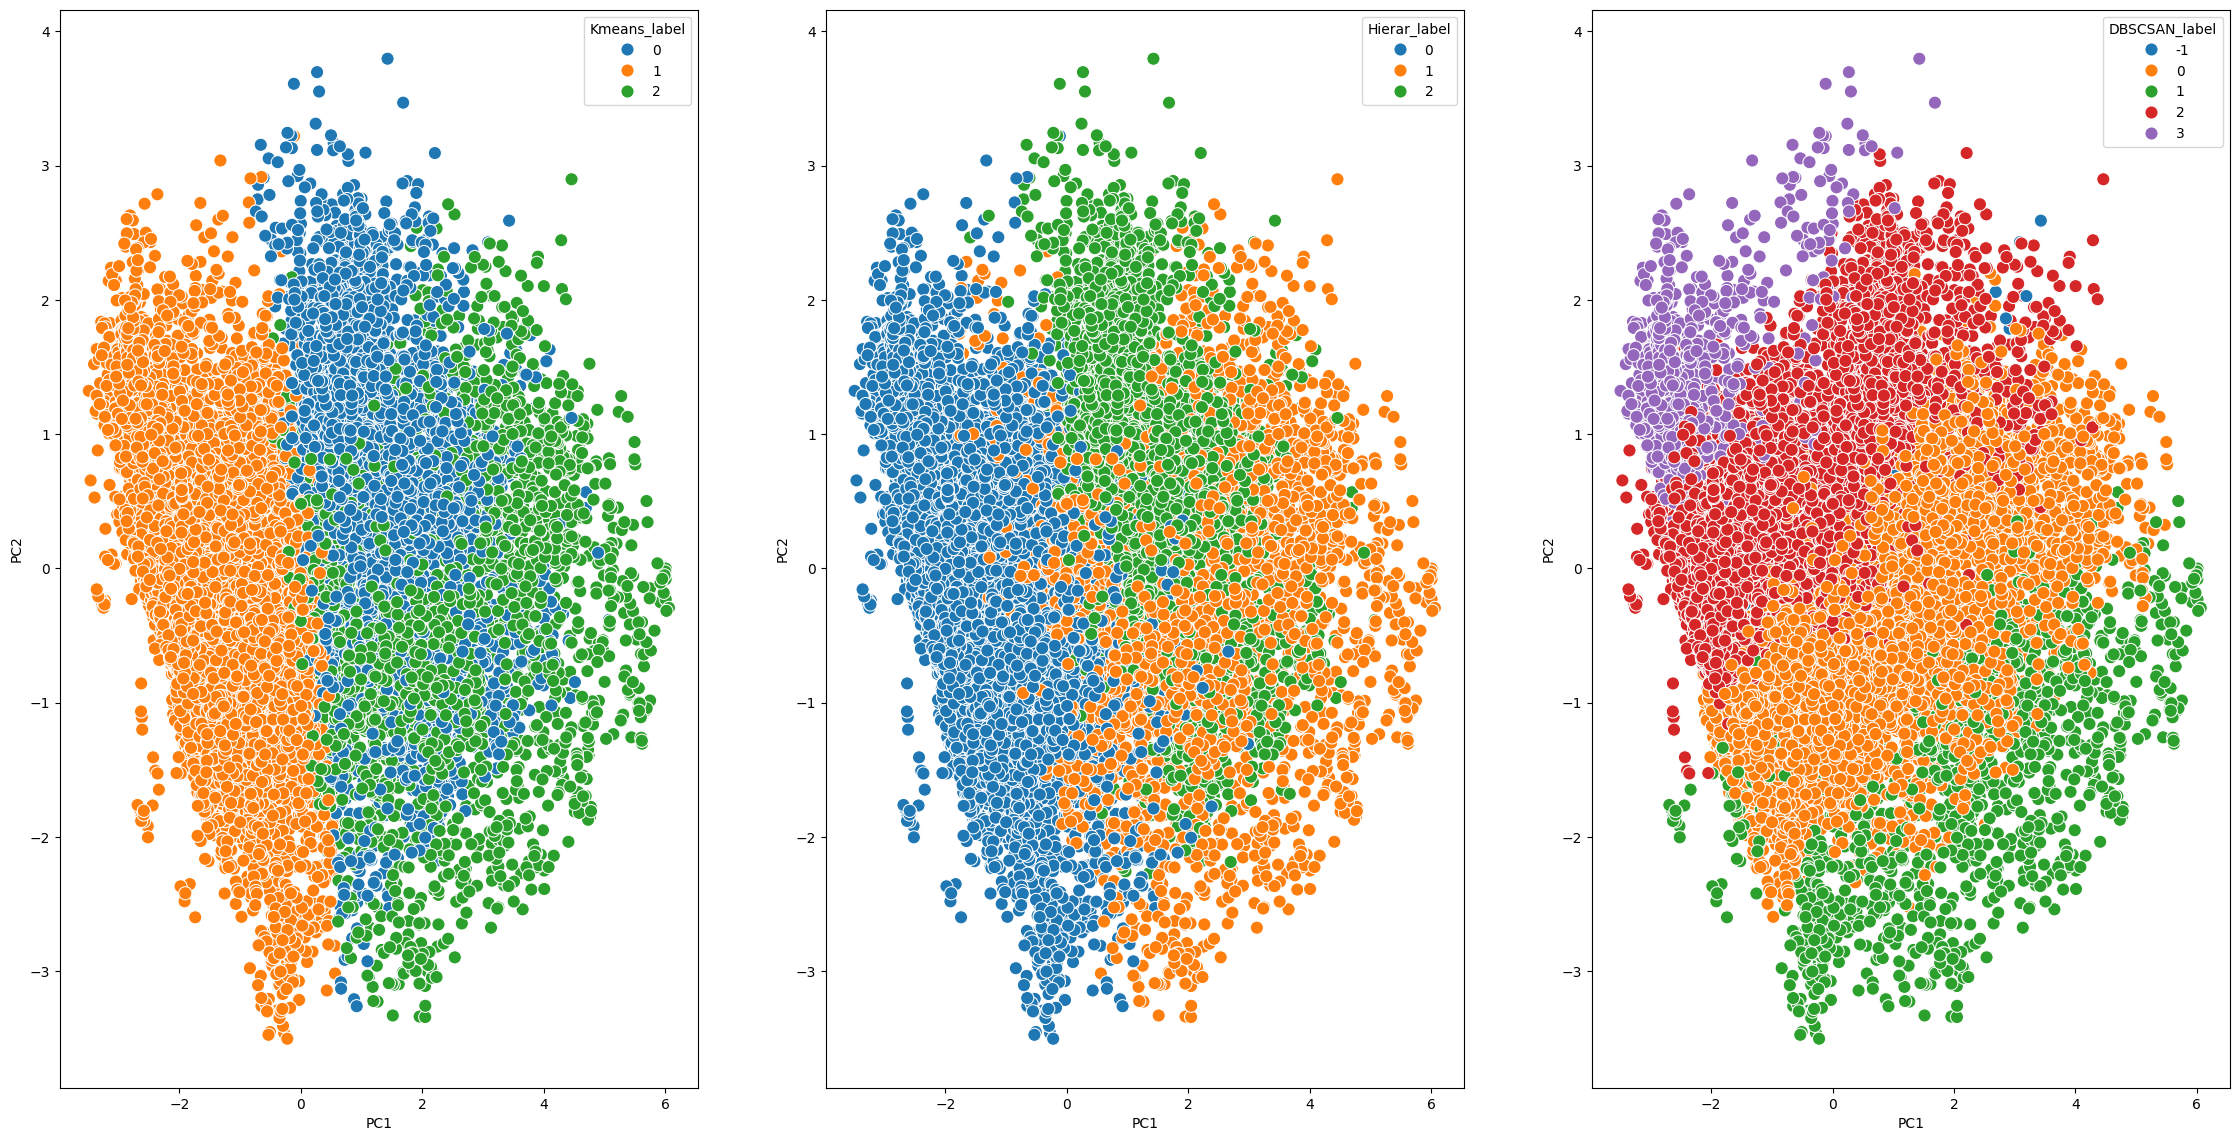

In [48]:
# set the plot size
plt.figure(figsize = (28, 14))

# plot a scatterplot to visualize the clusters
# pass the 1st and 2nd principal component to the parameter 'x' and 'y' respectively
# pass the dataframe of PCA components to the parameter 'data'
# pass the size of the data points to the parameter 's'
# pass the cluster labels to the parameter 'hue' to display the clusters with different colors
# pass the required colors to the parameter 'palette'

# plot the first subplot
# pass the row, column and plot index to the 'subplot()'
plt.subplot(1,3,1)
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca,  s = 90, hue = df_power['Kmeans_label'], palette = 'tab10')

# plot the second subplot
# pass the row, column and plot index to the 'subplot()'
plt.subplot(1,3,2)
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca,  s = 90, hue = df_power['Hierar_label'], palette = 'tab10')

# plot the third subplot
# pass the row, column and plot index to the 'subplot()'
plt.subplot(1,3,3)
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca,  s = 90, hue = df_power['DBSCSAN_label'], palette = 'tab10')

# display the plot
plt.show()

#Result

The subplots above represent clusters formed by different algorithms. We can see that the K-means and hierarchical clustering have created 3 clusters, while the DBSCAN algorithm has grouped the data into 4 clusters.

The plots for K-means and hierarchical clustering show similarity in cluster formation. The DBSCAN algorithm has clustered houses based on the power consumption of the other appliances in the house. Also, the blue points in the DBSCAN plot represent the outliers identified by the algorithm.

We can see that some points overlap in the subplots, this is because we have projected a 7-D dataset to 2-D which is explaining only 65 percent of total variance in the original data.